In [5]:
from ultralytics import YOLO
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<span style="font-size: 20px;"> Splitting the data 


In [4]:
import random
import shutil
import os

# Define paths
data_dir = r"C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class"
train_dir = r"C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\train"
val_dir = r"C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\val"
test_dir =r"C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\test"


# Create directories if not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Define the percentage split
train_percent = 0.7
test_percent = 0.15
val_percent = 0.1

# Iterate over class folders
class_folders = os.listdir(data_dir)
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        # Create class directories in train, test, and val folders
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)

        # Get list of images in class folder
        images = os.listdir(class_path)
        num_images = len(images)

        # Shuffle images
        random.shuffle(images)

        # Calculate split indices
        num_train = round(num_images * train_percent)
        num_test = round(num_images * test_percent)
        num_val = num_images - num_train - num_test

        # Split images into train, test, and val sets
        train_images = images[:num_train]
        test_images = images[num_train:num_train + num_test]
        val_images = images[num_train + num_test:]

        # Copy images to respective directories
        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_dir, class_folder, image)
            shutil.copy(src, dst)
        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_dir, class_folder, image)
            shutil.copy(src, dst)
        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_dir, class_folder, image)
            shutil.copy(src, dst)


<span style="font-size: 20px;">Classification Model : yolov8x-cls</span>


In [7]:
model = YOLO('yolov8x-cls.pt')  # load a pretrained model (recommended for training)

In [8]:
results = model.train(data=r"C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class", epochs=25, imgsz=64,lr0=0.01,lrf=0.001)

New https://pypi.org/project/ultralytics/8.2.10 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42  Python-3.11.7 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class, epochs=25, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train37, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\train... 6313 images, 0 corrupt: 100%|██████████| 6313/6313 [00:07<00:00, 891.10it/s] 


train: New cache created: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\train.cache


val: Scanning C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\val... 1354 images, 0 corrupt: 100%|██████████| 1354/1354 [00:01<00:00, 848.34it/s]

val: New cache created: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs\classify\train37
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:23<00:00,  1.84it/s]

                   all      0.761      0.965



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]

                   all      0.885      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]

                   all      0.887      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:19<00:00,  2.23it/s]

                   all      0.916      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:19<00:00,  2.22it/s]

                   all      0.929      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.38it/s]

                   all      0.942      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.38it/s]

                   all      0.937      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]

                   all      0.939      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:17<00:00,  2.42it/s]

                   all       0.95      0.999



      Epoch    GPU_mem       loss  Instances       Size


      10/25         0G     0.3378          9         64: 100%|██████████| 395/395 [06:24<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.34it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


      11/25         0G     0.2999          9         64: 100%|██████████| 395/395 [06:49<00:00,  1.04s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:21<00:00,  2.01it/s]

                   all       0.96      0.999



      Epoch    GPU_mem       loss  Instances       Size


      12/25         0G     0.2847          9         64: 100%|██████████| 395/395 [06:32<00:00,  1.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:16<00:00,  2.57it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


      13/25         0G      0.262          9         64: 100%|██████████| 395/395 [05:57<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:17<00:00,  2.40it/s]

                   all      0.967      0.999



      Epoch    GPU_mem       loss  Instances       Size


      14/25         0G      0.227          9         64: 100%|██████████| 395/395 [05:58<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:19<00:00,  2.21it/s]

                   all       0.96      0.999



      Epoch    GPU_mem       loss  Instances       Size


      15/25         0G     0.2267          9         64: 100%|██████████| 395/395 [06:13<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]

                   all      0.963      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/25         0G     0.2202          9         64: 100%|██████████| 395/395 [06:24<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:20<00:00,  2.13it/s]

                   all      0.959      0.999



      Epoch    GPU_mem       loss  Instances       Size


      17/25         0G     0.2094          9         64: 100%|██████████| 395/395 [06:27<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:20<00:00,  2.08it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      18/25         0G     0.1878          9         64: 100%|██████████| 395/395 [06:34<00:00,  1.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:20<00:00,  2.14it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      19/25         0G     0.1814          9         64: 100%|██████████| 395/395 [06:13<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:18<00:00,  2.31it/s]

                   all      0.964      0.999



      Epoch    GPU_mem       loss  Instances       Size


      20/25         0G     0.1757          9         64: 100%|██████████| 395/395 [10:04<00:00,  1.53s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:44<00:00,  1.03s/it]

                   all      0.973      0.999



      Epoch    GPU_mem       loss  Instances       Size


      21/25         0G     0.1566          9         64: 100%|██████████| 395/395 [11:50<00:00,  1.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:43<00:00,  1.02s/it]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      22/25         0G     0.1444          9         64: 100%|██████████| 395/395 [12:41<00:00,  1.93s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:43<00:00,  1.01s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      23/25         0G     0.1456          9         64: 100%|██████████| 395/395 [12:55<00:00,  1.96s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:43<00:00,  1.01s/it]

                   all      0.965      0.999



      Epoch    GPU_mem       loss  Instances       Size


      24/25         0G     0.1493          9         64: 100%|██████████| 395/395 [13:16<00:00,  2.02s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:41<00:00,  1.05it/s]

                   all      0.967      0.999



      Epoch    GPU_mem       loss  Instances       Size


      25/25         0G     0.1393          9         64: 100%|██████████| 395/395 [12:54<00:00,  1.96s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]

                   all      0.964      0.999



25 epochs completed in 3.500 hours.
Optimizer stripped from runs\classify\train37\weights\last.pt, 112.5MB
Optimizer stripped from runs\classify\train37\weights\best.pt, 112.5MB

Validating runs\classify\train37\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.11.7 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8x-cls summary (fused): 133 layers, 56148820 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\train... found 6313 images in 20 classes  
val: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\val... found 1354 images in 20 classes  
test: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\test... found 1353 images in 20 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 43/43 [00:37<00:00,  1.15it/s]


                   all      0.972          1
Speed: 0.0ms preprocess, 24.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train37
Results saved to runs\classify\train37


<span style="font-size: 20px;">Model evaluation </span>


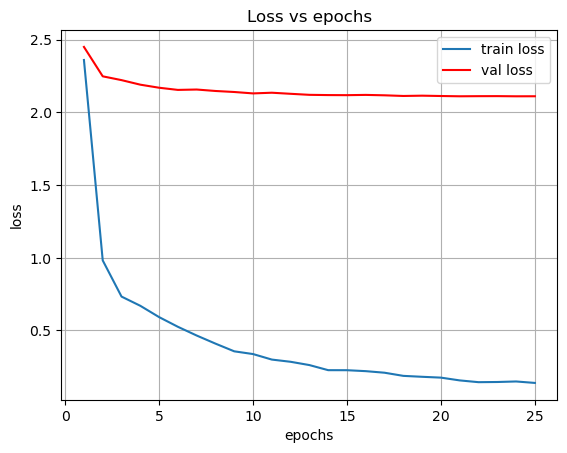

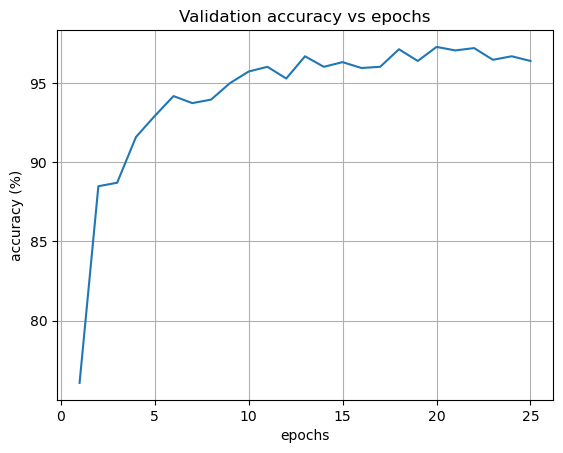

In [12]:
# Assuming 'results.csv' is in the same directory as this script
results_path = r"C:\Users\HP\Downloads\runs\classify\train37\results.csv"

# Read the CSV file
results = pd.read_csv(r"C:\Users\HP\Downloads\runs\classify\train37\results.csv")

# Plot loss vs epochs
plt.figure()
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

# Plot validation accuracy vs epochs
plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()


In [14]:
model = YOLO(r"C:\Users\HP\Downloads\runs\classify\train37\weights\last.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.1.42  Python-3.11.7 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8x-cls summary (fused): 133 layers, 56148820 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\train... found 6313 images in 20 classes  
val: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\val... found 1354 images in 20 classes  
test: C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\test... found 1353 images in 20 classes  


val: Scanning C:\Users\HP\Downloads\airplane-dataset-asoc\airplane-dataset-trans\data_class\val... 1354 images, 0 corrupt: 100%|██████████| 1354/1354 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:16<00:00,  5.06it/s]


                   all      0.964      0.999
Speed: 0.0ms preprocess, 10.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\val8


0.9992614388465881

 <span style="font-size: 20px;">Using the model for prediction</span>


In [13]:
model = YOLO(r"C:\Users\HP\Downloads\runs\classify\train37\weights\last.pt")  # load a custom model

results = model(r"C:\Users\HP\Downloads\be200.jpg")  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
confidence = np.argmax(probs)
print(probs)

print(names_dict[confidence])
print(confidence,"%")


image 1/1 C:\Users\HP\Downloads\be200.jpg: 64x64 type-16(A-26) 0.70, type-17(P-63) 0.14, C-130 0.13, C-135 0.00, type-15(A-10) 0.00, 62.5ms
Speed: 53.9ms preprocess, 62.5ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
{0: 'B-1', 1: 'B-2', 2: 'B-52', 3: 'C-130', 4: 'C-135', 5: 'C-17', 6: 'C-5', 7: 'E-3', 8: 'F-22', 9: 'KC-10', 10: 'type-12(C-21)', 11: 'type-13(U-2)', 12: 'type-14(F-22)', 13: 'type-15(A-10)', 14: 'type-16(A-26)', 15: 'type-17(P-63)', 16: 'type-18(F-16)', 17: 'type-19(T-6)', 18: 'type-20(B-29)', 19: 'type-21(t-43)'}
[0.0004857134772464633, 0.0006870435900054872, 0.0013582177925854921, 0.13352960348129272, 0.003791063092648983, 0.002492307685315609, 0.0005531042697839439, 0.00047686570906080306, 0.0008343270164914429, 0.0016718661645427346, 0.0004250391211826354, 0.0022534707095474005, 0.00045257393503561616, 0.002711304696276784, 0.702555775642395, 0.14324402809143066, 0.00047893531154841185, 0.0001998720836127177, 0.0006360004772432148, 0.0011629274813

In [15]:
# Load the image (replace with your actual image path)
img = cv2.imread(r"C:\Users\HP\Downloads\be200.jpg")

# Check if image loading was successful
if img is None:
    print("Error: Could not read image!")
    exit()

# Load your custom classification YOLO model (replace with your model path)
model = YOLO("C:/Users/HP/Downloads/runs/classify/train37/weights/last.pt")

# Make predictions on the image
results = model(img)

# Assuming results is a list containing a single detection (classification)
if len(results) != 1:
    print("Warning: Unexpected number of detections in results. Only processing the first one.")

# Extract predicted class name and confidence from the first detection
names_dict = results[0].names
probs = results[0].probs.data.tolist()
 # Assuming names attribute contains class names
predicted_class_name = names_dict[np.argmax(probs)]
confidence = np.argmax(probs)  # Assuming conf attribute contains confidence score

# Display predicted class and confidence score (modify placement as needed)
text = f"Predicted Class: {predicted_class_name} - Confidence: {confidence:.2f}%"
cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the image with prediction
cv2.imshow("Image with Prediction", img)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()



0: 64x64 type-16(A-26) 0.70, type-17(P-63) 0.14, C-130 0.13, C-135 0.00, type-15(A-10) 0.00, 45.7ms
Speed: 15.6ms preprocess, 45.7ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
